### Inventaire des données trampo acquises les 28 et 29 avril 2023

1 trampo :
- Séquences / participant
- Frames / participant

2 trampos :
- Séquences avec apparition / participant

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

base_path = '/mnt/D494C4CF94C4B4F0/Trampoline_avril2025/Videos_trampo_avril2025'

### 1 trampo (28PM + 29)

In [2]:
participants_counter = {}
participants_frames_counter = {}

def count_frames(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Could not open video file: {video_path}")
        return -1

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    return total_frames

for video in os.listdir(os.path.join(base_path, '20250429')):
    if str(video).split('.')[-1] == 'mp4':
        video_name = str(video)

        # Sequence counter
        participant = video_name[0]
        if participant not in participants_counter:
            participants_counter.update({participant: 1})
        else:
            participants_counter[participant] += 1

        # Frames counter
        frames = count_frames(os.path.join(base_path, '20250429', video))
        if participant not in participants_frames_counter:
            participants_frames_counter.update({participant: frames})
        else:
            participants_frames_counter[participant] += frames

for video in os.listdir(os.path.join(base_path, '20250428PM')):
    if str(video).split('.')[-1] == 'mp4':
        video_name = str(video)
        # Sequence counter
        participant = video_name[0]
        if participant not in participants_counter:
            participants_counter.update({participant: 1})
        else:
            participants_counter[participant] += 1

        # Frames counter
        frames = count_frames(os.path.join(base_path, '20250428PM', video))
        if participant not in participants_frames_counter:
            participants_frames_counter.update({participant: frames})
        else:
            participants_frames_counter[participant] += frames

print('Number of sequences per participant id')
print(participants_counter)

print('Number of sequences (all cams) per participant id')
print({k: v//8 for k, v in participants_counter.items()})

print('Number of frames per participant id')
print(participants_frames_counter)

Number of sequences per participant id
{'1': 410, '2': 344, '3': 376, '7': 136}
Number of sequences (all cams) per participant id
{'1': 51, '2': 43, '3': 47, '7': 17}
Number of frames per participant id
{'1': 443280, '2': 428664, '3': 359968, '7': 112504}


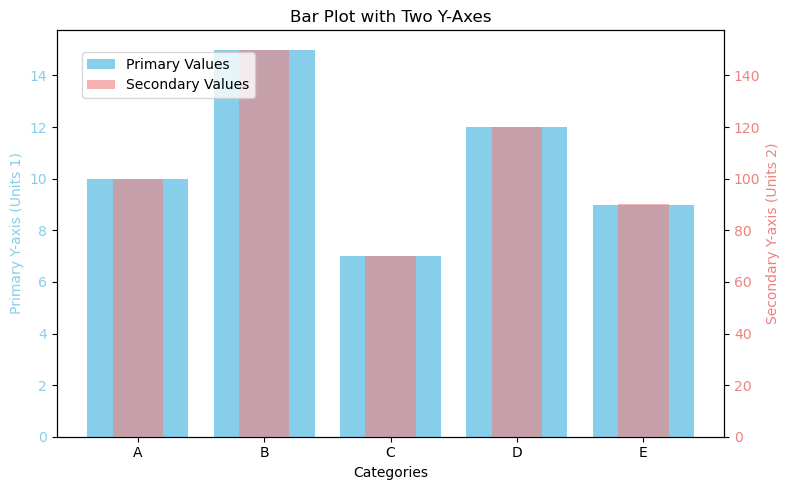

In [ ]:
# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
values1 = [10, 15, 7, 12, 9]  # Data for the primary Y-axis
values2 = [100, 150, 70, 120, 90] # Data for the secondary Y-axis

# Create the figure and primary axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the first set of bars on the primary Y-axis (ax1)
ax1.bar(categories, values1, color='skyblue', label='Primary Values')

# Create a secondary Y-axis that shares the same X-axis
ax2 = ax1.twinx()

ax2.bar(categories, values2, color='lightcoral', alpha=0.6, width=0.4, label='Secondary Values') # Example of offset and transparency
ax2.set_ylabel('Secondary Y-axis (Units 2)', color='lightcoral')

# Add titles and legends
plt.title('Bar Plot with Two Y-Axes')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9)) # Place legend for both axes

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

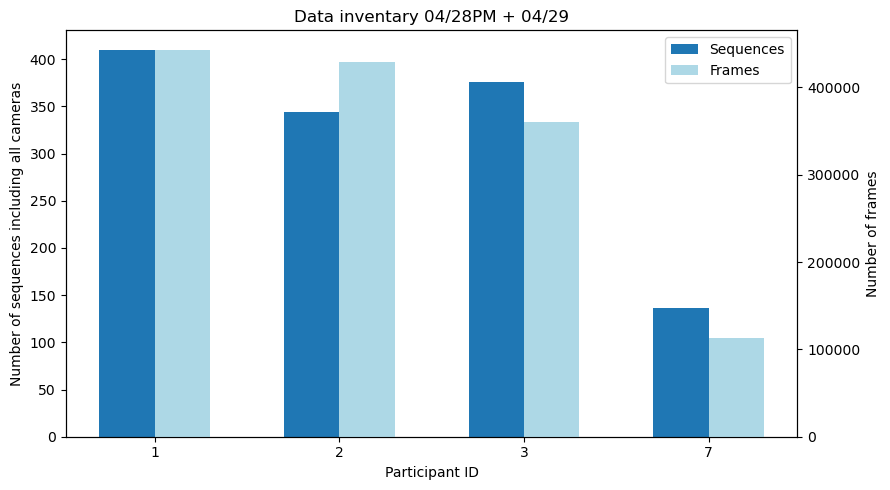

In [27]:
fig, ax = plt.subplots(figsize=(9,5))
ax.bar(participants_counter.keys(), participants_counter.values(), width= -0.3, align='edge', label='Sequences')

ax2 = ax.twinx()
ax2.bar(participants_frames_counter.keys(), participants_frames_counter.values(), color='lightblue', width=0.3, align='edge', label='Frames')

ax.set_xlabel('Participant ID')
ax.set_ylabel('Number of sequences including all cameras')
ax2.set_ylabel('Number of frames')

# Collect handles & labels from both axes
handles, labels = [], []
for axis in [ax, ax2]:
    h, l = axis.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Create one fused legend
ax.legend(handles, labels, loc='upper right')

ax.set_title('Data inventary 04/28PM + 04/29')
plt.tight_layout()
plt.show()


### 2 trampos (28AM)